# Generador de instancias
En este notebook está el código para generar los sets de instancias que se usan para experimentar.
- Estas instancias van a ser guardadas en la carpeta __instancias__.
- Cada set estará en su propia carpeta y tendrá un archivo _indice.csv_ que contendrá información sobre las instancias.

In [24]:
import random, math
import pandas as pd

In [25]:
def save_instance(dataset, instance_name, Pesos,Resistencias, R):
    with open(F"instancias/{dataset}/{instance_name}.txt", "w") as f:
          
        print(len(Pesos), R, file=f)

        for i in range(len(Pesos)-1): 
            print(Pesos[i], file=f, end=" ")
        print(Pesos[-1], file=f)
        
        for i in range(len(Resistencias)-1): 
            print(Resistencias[i], file=f, end=" ")
        #bug: print(Resistencias[-1], file=f,end="")
        print(Resistencias[-1], file=f)

def save_index(dataset, instances):
    with open(F"instancias/{dataset}/instances.txt", "w") as f:
        for instance in instances: 
            print(instance, file=f)

## Dataset 1 - Todos rompen el jambotubo
Instancias de mejor caso de backtracking poda factibilidad, están descriptas en el informe en más detalle. Los pesos de los productos de estas instancias son todos mayores a la resistencia del $jambotubo$.
\
$ Pesos = \{p_1,p_2,.., p_n\}$ con $\ p_i > R $


In [3]:
filas_indice = []
for i in range(1, 1001):
    n = i * 10
    R = 1000
    Pesos = [R+1 for i in range(0, n)]
    Resistencias = [random.randrange(1, 100, 1) for i in range(0,n)] # arbitrario
    save_instance("mejor-caso-bt-f", F"BT-MC-F-{n}", Pesos,Resistencias, R)
    filas_indice.append(["mejor-caso-bt-f", F"BT-MC-F-{n}", n, R, F"instancias/mejor-caso-bt-f/BT-MC-F-{n}.txt"])
pd.DataFrame(filas_indice, columns=["dataset", "instancia", "n", "R", "archivo"]).to_csv("instancias/mejor-caso-bt-f/indice.csv", index=False, header=True)

# Dataset 5 - Programacion Dinamica

Instancias variando n y W. Buscamos observar de que manera crece la complejidad en relacion a n y R , buscando confirma la cota teorica de $O(nR)$.

In [3]:
#random.seed(10)
desde = 1000
hasta = 8000
filas_indice = []
for n in range(desde, hasta, 500):
    for R in range(desde, hasta, 500):
        rfloor = max(1, math.floor(n * (n-1) / 4))
        
        Pesos = [random.randrange(1, n, 1) for i in range(n)]
        #Pesos = [i for i in range(n)]
        random.shuffle(Pesos)
        Resistencias = [random.randrange(rfloor, rfloor*2, 1) for i in range(n)]
        
        save_instance("dinamica", F"DP-{n}-{R}", Pesos, Resistencias, R)
        filas_indice.append(["dinamica", F"DP-{n}-{R}", n, R, F"instancias/dinamica/DP-{n}-{R}.txt"])

pd.DataFrame(filas_indice, columns=["dataset", "instancia", "n", "R", "archivo"]).to_csv("instancias/dinamica/indice.csv", index=False, header=True)

# Dataset 5 - Programacion Dinamica M2


In [27]:
#random.seed(10)
desde = 1000
hasta = 8000
filas_indice = []
for n in range(desde, hasta, 500):
    for R in range(desde, hasta, 500):
        
        if (R > n):
            Pesos = [random.randrange(math.floor(R/n), math.floor(4*R/n), 1) for i in range(n)]
            random.shuffle(Pesos)
            Resistencias = [random.randrange(math.floor(R/4), R*2, 1) for i in range(n)]
            random.shuffle(Resistencias)
        else:
            Pesos = [random.randrange(1, 50, 1) for i in range(n)]
            random.shuffle(Pesos)
            Resistencias = [random.randrange(math.floor(R/4), R*2, 1) for i in range(n)]
            random.shuffle(Resistencias)

        save_instance("dinamicaM2", F"DP2-{n}-{R}", Pesos, Resistencias, R)
        filas_indice.append(["dinamicaM2", F"DP2-{n}-{R}", n, R, F"instancias/dinamicaM2/DP2-{n}-{R}.txt"])

pd.DataFrame(filas_indice, columns=["dataset", "instancia", "n", "R", "archivo"]).to_csv("instancias/dinamicaM2/indice.csv", index=False, header=True)

/home/gianluca/Documents/Algoritmos3/Venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

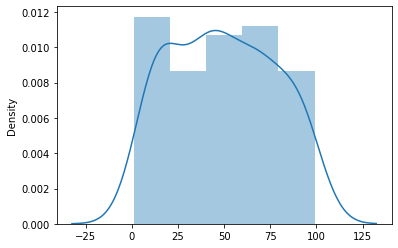

In [21]:
import seaborn as sns
import random
n = 100
y =  [random.randrange(1, n, 1) for i in range(n)]
x =  [i for i in range(n)]

sns.distplot(x = y)

# 

## Dataset 2
Instancias de peor caso de backtracking, están descriptas en el informe en más detalle.
```
S = {1, ..., 1, 1} con W = n
```

In [11]:
filas_indice = []
for n in range(1, 31):
    W = n
    S = [1 for i in range(0, n)]
    save_instance("peor-caso-bt", F"BT-PC-{n}", S, W)
    filas_indice.append(["peor-caso-bt", F"BT-PC-{n}", n, W, F"instancias/peor-caso-bt/BT-PC-{n}.txt"])
pd.DataFrame(filas_indice, columns=["dataset", "instancia", "n", "W", "archivo"]).to_csv("instancias/peor-caso-bt/indice.csv", index=False, header=True)

## Dataset 3
Instancias con densidad alta:
```
S = { 1, ..., n } con W = n/2
```

In [12]:
filas_indice = []
for n in range(1, 201):
    W = math.floor(n/2)
    S = [0 for i in range(0, n)]
    for i in range(0, n): S[i] = i+1
    random.shuffle(S)
    save_instance("densidad-alta", F"ALTA-{n}", S, W)
    filas_indice.append(["densidad-alta", F"ALTA-{n}", n, W, F"instancias/densidad-alta/ALTA-{n}.txt"])
pd.DataFrame(filas_indice, columns=["dataset", "instancia", "n", "W", "archivo"]).to_csv("instancias/densidad-alta/indice.csv", index=False, header=True)

## Dataset 4
Instancias con densidad baja:
```
S = { 1, ..., n } con W = n/2  
```

In [13]:
filas_indice = []
for n in range(1, 201):
    W = max(1, math.floor(n * (n-1) / 4))
    S = [0 for i in range(0, n)]
    for i in range(0, n): S[i] = i+1
    random.shuffle(S)
    save_instance("densidad-baja", F"BAJA-{n}", S, W)
    filas_indice.append(["densidad-baja", F"BAJA-{n}", n, W, F"instancias/densidad-baja/BAJA-{n}.txt"])
pd.DataFrame(filas_indice, columns=["dataset", "instancia", "n", "W", "archivo"]).to_csv("instancias/densidad-baja/indice.csv", index=False, header=True)